# TV Script Generation
In this project, you'll generate your own [Simpsons](https://en.wikipedia.org/wiki/The_Simpsons) TV scripts using RNNs.  You'll be using part of the [Simpsons dataset](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data) of scripts from 27 seasons.  The Neural Network you'll build will generate a new TV script for a scene at [Moe's Tavern](https://simpsonswiki.com/wiki/Moe's_Tavern).
## Get the Data
The data is already provided for you.  You'll be using a subset of the original dataset.  It consists of only the scenes in Moe's Tavern.  This doesn't include other versions of the tavern, like "Moe's Cavern", "Flaming Moe's", "Uncle Moe's Family Feed-Bag", etc..

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

data_dir = './data/simpsons/moes_tavern_lines.txt'
text = helper.load_data(data_dir)
# Ignore notice, since we don't use it for analysing the data
text = text[81:]

## Explore the Data
Play around with `view_sentence_range` to view different parts of the data.

In [2]:
view_sentence_range = (0, 10)

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

print('Dataset Stats')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))
scenes = text.split('\n\n')
print('Number of scenes: {}'.format(len(scenes)))
sentence_count_scene = [scene.count('\n') for scene in scenes]
print('Average number of sentences in each scene: {}'.format(np.average(sentence_count_scene)))

sentences = [sentence for scene in scenes for sentence in scene.split('\n')]
print('Number of lines: {}'.format(len(sentences)))
word_count_sentence = [len(sentence.split()) for sentence in sentences]
print('Average number of words in each line: {}'.format(np.average(word_count_sentence)))

print()
print('The sentences {} to {}:'.format(*view_sentence_range))
print('\n'.join(text.split('\n')[view_sentence_range[0]:view_sentence_range[1]]))

Dataset Stats
Roughly the number of unique words: 11492
Number of scenes: 262
Average number of sentences in each scene: 15.251908396946565
Number of lines: 4258
Average number of words in each line: 11.50164396430249

The sentences 0 to 10:

Moe_Szyslak: (INTO PHONE) Moe's Tavern. Where the elite meet to drink.
Bart_Simpson: Eh, yeah, hello, is Mike there? Last name, Rotch.
Moe_Szyslak: (INTO PHONE) Hold on, I'll check. (TO BARFLIES) Mike Rotch. Mike Rotch. Hey, has anybody seen Mike Rotch, lately?
Moe_Szyslak: (INTO PHONE) Listen you little puke. One of these days I'm gonna catch you, and I'm gonna carve my name on your back with an ice pick.
Moe_Szyslak: What's the matter Homer? You're not your normal effervescent self.
Homer_Simpson: I got my problems, Moe. Give me another one.
Moe_Szyslak: Homer, hey, you should not drink to forget your problems.
Barney_Gumble: Yeah, you should only drink to enhance your social skills.



## Implement Preprocessing Functions
The first thing to do to any dataset is preprocessing.  Implement the following preprocessing functions below:
- Lookup Table
- Tokenize Punctuation

### Lookup Table
To create a word embedding, you first need to transform the words to ids.  In this function, create two dictionaries:
- Dictionary to go from the words to an id, we'll call `vocab_to_int`
- Dictionary to go from the id to word, we'll call `int_to_vocab`

Return these dictionaries in the following tuple `(vocab_to_int, int_to_vocab)`

In [3]:
import numpy as np
import problem_unittests as tests
from collections import Counter

def create_lookup_tables(text):
    """
    Create lookup tables for vocabulary
    :param text: The text of tv scripts split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    counts = Counter(text)
    vocab = [word for (word, count) in counts.most_common()]

    vocab_to_int = {vocab[i]: i for i in range(len(vocab))}
    int_to_vocab = {i: vocab[i] for i in range(len(vocab))}

    return (vocab_to_int, int_to_vocab)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_create_lookup_tables(create_lookup_tables)

D:\Programs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tests Passed


### Tokenize Punctuation
We'll be splitting the script into a word array using spaces as delimiters.  However, punctuations like periods and exclamation marks make it hard for the neural network to distinguish between the word "bye" and "bye!".

Implement the function `token_lookup` to return a dict that will be used to tokenize symbols like "!" into "||Exclamation_Mark||".  Create a dictionary for the following symbols where the symbol is the key and value is the token:
- Period ( . )
- Comma ( , )
- Quotation Mark ( " )
- Semicolon ( ; )
- Exclamation mark ( ! )
- Question mark ( ? )
- Left Parentheses ( ( )
- Right Parentheses ( ) )
- Dash ( -- )
- Return ( \n )

This dictionary will be used to token the symbols and add the delimiter (space) around it.  This separates the symbols as it's own word, making it easier for the neural network to predict on the next word. Make sure you don't use a token that could be confused as a word. Instead of using the token "dash", try using something like "||dash||".

In [4]:
def token_lookup():
    """
    Generate a dict to turn punctuation into a token.
    :return: Tokenize dictionary where the key is the punctuation and the value is the token
    """
    punctuation_to_token = {
        ".": "||Period||",
        ",": "||Comma||",
        '"': "||Quotation_Mark||",
        ";": "||Semicolon||",
        "!": "||Exaclamation_Mark||",
        "?": "||Question_Mark||",
        "(": "||Left_Parentheses||",
        ")": "||Right_Parentheses||",
        "--": "||Dash||",
        "\n": "||Return||"
    }
    return punctuation_to_token

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_tokenize(token_lookup)

Tests Passed


## Preprocess all the data and save it
Running the code cell below will preprocess all the data and save it to file.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(data_dir, token_lookup, create_lookup_tables)

# Check Point
This is your first checkpoint. If you ever decide to come back to this notebook or have to restart the notebook, you can start from here. The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import numpy as np
import problem_unittests as tests

int_text, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()

D:\Programs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Build the Neural Network
You'll build the components necessary to build a RNN by implementing the following functions below:
- get_inputs
- get_init_cell
- get_embed
- build_rnn
- build_nn
- get_batches

### Check the Version of TensorFlow and Access to GPU

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.3'), 'Please use TensorFlow version 1.3 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.10.0
Default GPU Device: /device:GPU:0


### Input
Implement the `get_inputs()` function to create TF Placeholders for the Neural Network.  It should create the following placeholders:
- Input text placeholder named "input" using the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) `name` parameter.
- Targets placeholder
- Learning Rate placeholder

Return the placeholders in the following tuple `(Input, Targets, LearningRate)`

In [3]:
def get_inputs():
    """
    Create TF Placeholders for input, targets, and learning rate.
    :return: Tuple (input, targets, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(tf.int32, [None, None], name="input")
    targets = tf.placeholder(tf.int32, [None, None], name="target")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    
    return inputs, targets, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_inputs(get_inputs)

Tests Passed


### Build RNN Cell and Initialize
Stack one or more [`BasicLSTMCells`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicLSTMCell) in a [`MultiRNNCell`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/MultiRNNCell).
- The Rnn size should be set using `rnn_size`
- Initalize Cell State using the MultiRNNCell's [`zero_state()`](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/MultiRNNCell#zero_state) function
    - Apply the name "initial_state" to the initial state using [`tf.identity()`](https://www.tensorflow.org/api_docs/python/tf/identity)

Return the cell and initial state in the following tuple `(Cell, InitialState)`

In [4]:
def get_LSTM_cell(rnn_size):
    lstm = tf.nn.rnn_cell.BasicLSTMCell(rnn_size)
#     drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    return lstm

def get_init_cell(batch_size, rnn_size):
    """
    Create an RNN Cell and initialize it.
    :param batch_size: Size of batches
    :param rnn_size: Size of RNNs
    :return: Tuple (cell, initialize state)
    """
    # TODO: Implement Function
    lstm_layers = 2
#     keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    cell = tf.contrib.rnn.MultiRNNCell([get_LSTM_cell(rnn_size) for _ in range(lstm_layers)])
    initial_state = cell.zero_state(batch_size, tf.float32)
    initial_state = tf.identity(initial_state, name='initial_state')

    return (cell, initial_state)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_init_cell(get_init_cell)

Tests Passed


### Word Embedding
Apply embedding to `input_data` using TensorFlow.  Return the embedded sequence.

In [5]:
def get_embed(input_data, vocab_size, embed_dim):
    """
    Create embedding for <input_data>.
    :param input_data: TF placeholder for text input.
    :param vocab_size: Number of words in vocabulary.
    :param embed_dim: Number of embedding dimensions
    :return: Embedded input.
    """
    # TODO: Implement Function
    embedding_matrix = tf.Variable(tf.truncated_normal([vocab_size, embed_dim]))
    embedded_input = tf.nn.embedding_lookup(embedding_matrix, input_data)
    return embedded_input


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_embed(get_embed)

Tests Passed


### Build RNN
You created a RNN Cell in the `get_init_cell()` function.  Time to use the cell to create a RNN.
- Build the RNN using the [`tf.nn.dynamic_rnn()`](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn)
 - Apply the name "final_state" to the final state using [`tf.identity()`](https://www.tensorflow.org/api_docs/python/tf/identity)

Return the outputs and final_state state in the following tuple `(Outputs, FinalState)` 

In [6]:
def build_rnn(cell, inputs):
    """
    Create a RNN using a RNN Cell
    :param cell: RNN Cell
    :param inputs: Input text data
    :return: Tuple (Outputs, Final State)
    """
    # TODO: Implement Function
    outputs, final_state = tf.nn.dynamic_rnn(cell, inputs, dtype=tf.float32)
    final_state = tf.identity(final_state, name="final_state")
    return (outputs, final_state)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_build_rnn(build_rnn)

Tests Passed


### Build the Neural Network
Apply the functions you implemented above to:
- Apply embedding to `input_data` using your `get_embed(input_data, vocab_size, embed_dim)` function.
- Build RNN using `cell` and your `build_rnn(cell, inputs)` function.
- Apply a fully connected layer with a linear activation and `vocab_size` as the number of outputs.

Return the logits and final state in the following tuple (Logits, FinalState) 

In [7]:
def build_nn(cell, rnn_size, input_data, vocab_size, embed_dim):
    """
    Build part of the neural network
    :param cell: RNN cell
    :param rnn_size: Size of rnns
    :param input_data: Input data
    :param vocab_size: Vocabulary size
    :param embed_dim: Number of embedding dimensions
    :return: Tuple (Logits, FinalState)
    """
    # TODO: Implement Function
    embedded_input = get_embed(input_data, vocab_size, embed_dim)
    outputs, final_state = build_rnn(cell, embedded_input)
    logits = tf.layers.dense(outputs, vocab_size, activation= None, use_bias=True)
    
    return logits, final_state


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_build_nn(build_nn)

Tests Passed


### Batches
Implement `get_batches` to create batches of input and targets using `int_text`.  The batches should be a Numpy array with the shape `(number of batches, 2, batch size, sequence length)`. Each batch contains two elements:
- The first element is a single batch of **input** with the shape `[batch size, sequence length]`
- The second element is a single batch of **targets** with the shape `[batch size, sequence length]`

If you can't fill the last batch with enough data, drop the last batch.

For example, `get_batches([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 3, 2)` would return a Numpy array of the following:
```
[
  # First Batch
  [
    # Batch of Input
    [[ 1  2], [ 7  8], [13 14]]
    # Batch of targets
    [[ 2  3], [ 8  9], [14 15]]
  ]

  # Second Batch
  [
    # Batch of Input
    [[ 3  4], [ 9 10], [15 16]]
    # Batch of targets
    [[ 4  5], [10 11], [16 17]]
  ]

  # Third Batch
  [
    # Batch of Input
    [[ 5  6], [11 12], [17 18]]
    # Batch of targets
    [[ 6  7], [12 13], [18  1]]
  ]
]
```

Notice that the last target value in the last batch is the first input value of the first batch. In this case, `1`. This is a common technique used when creating sequence batches, although it is rather unintuitive.

In [8]:
def get_batches(int_text, batch_size, seq_length):
    """
    Return batches of input and target
    :param int_text: Text with the words replaced by their ids
    :param batch_size: The size of batch
    :param seq_length: The length of sequence
    :return: Batches as a Numpy array
    """
    # TODO: Implement Function
    words_per_batch = batch_size * seq_length
    num_batches = len(int_text)//(words_per_batch)
    
    int_text = np.array(int_text[:num_batches*words_per_batch])
    int_text = int_text.reshape(batch_size, -1)
    
    int_target = np.roll(int_text, -1)
    
    batches = np.zeros((num_batches, 2, batch_size, seq_length))
    
    batch_num = 0 
    for start in range(0, int_text.shape[1], seq_length):
        batches[batch_num] = np.array([
                                       int_text[:, start:start+seq_length], 
                                       int_target[:, start:start+seq_length]
                                      ]).copy()
        batch_num += 1
    return batches


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_batches(get_batches)

Tests Passed


## Neural Network Training
### Hyperparameters
Tune the following parameters:

- Set `num_epochs` to the number of epochs.
- Set `batch_size` to the batch size.
- Set `rnn_size` to the size of the RNNs.
- Set `embed_dim` to the size of the embedding.
- Set `seq_length` to the length of sequence.
- Set `learning_rate` to the learning rate.
- Set `show_every_n_batches` to the number of batches the neural network should print progress.

In [9]:
# Number of Epochs
num_epochs = 128
# Batch Size
batch_size = 128
# RNN Size
rnn_size = 512
# Embedding Dimension Size
embed_dim = 256
# Sequence Length
seq_length = 16
# Learning Rate
learning_rate = 0.001
# Show stats for every n number of batches
show_every_n_batches = 10

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
save_dir = './save'

### Build the Graph
Build the graph using the neural network you implemented.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from tensorflow.contrib import seq2seq

train_graph = tf.Graph()
with train_graph.as_default():
    vocab_size = len(int_to_vocab)
    input_text, targets, lr = get_inputs()
    input_data_shape = tf.shape(input_text)
    cell, initial_state = get_init_cell(input_data_shape[0], rnn_size)
    logits, final_state = build_nn(cell, rnn_size, input_text, vocab_size, embed_dim)

    # Probabilities for generating words
    probs = tf.nn.softmax(logits, name='probs')

    # Loss function
    cost = seq2seq.sequence_loss(
        logits,
        targets,
        tf.ones([input_data_shape[0], input_data_shape[1]]))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(lr)

    # Gradient Clipping
    gradients = optimizer.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
    train_op = optimizer.apply_gradients(capped_gradients)

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [17, 7]

save_dir = './save'

def build_train(
    num_epochs=128,
    batch_size=128,
    rnn_size=512,
    embed_dim=256,
    seq_length=16,
    learning_rate=0.001,
    show_every_n_batches=10):
    """
    DON'T MODIFY ANYTHING IN THIS CELL
    """
    from tensorflow.contrib import seq2seq

    losses = []
    train_graph = tf.Graph()
    with train_graph.as_default():
        vocab_size = len(int_to_vocab)
        input_text, targets, lr = get_inputs()
        input_data_shape = tf.shape(input_text)
        cell, initial_state = get_init_cell(input_data_shape[0], rnn_size)
        logits, final_state = build_nn(cell, rnn_size, input_text, vocab_size, embed_dim)

        # Probabilities for generating words
        probs = tf.nn.softmax(logits, name='probs')

        # Loss function
        cost = seq2seq.sequence_loss(
            logits,
            targets,
            tf.ones([input_data_shape[0], input_data_shape[1]]))

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)
        
        
        batches = get_batches(int_text, batch_size, seq_length)

    with tf.Session(graph=train_graph) as sess:
        sess.run(tf.global_variables_initializer())

    #     keep_prob =  tf.get_default_graph().get_tensor_by_name("keep_prob")

        for epoch_i in range(num_epochs):
            state = sess.run(initial_state, {input_text: batches[0][0]})

            for batch_i, (x, y) in enumerate(batches):
                feed = {
                    input_text: x,
                    targets: y,
                    initial_state: state,
    #                 keep_prob: 0.5,
                    lr: learning_rate}
                train_loss, state, _ = sess.run([cost, final_state, train_op], feed)
                
                losses.append(train_loss)
                # Show every <show_every_n_batches> batches
                if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                    print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                        epoch_i,
                        batch_i,
                        len(batches),
                        train_loss))

        # Save Model
        saver = tf.train.Saver()
        saver.save(sess, save_dir)
        print('Model Trained and Saved')
    plt.plot(losses)
    plt.show()
    helper.save_params((seq_length, save_dir))  
    return losses

Epoch   0 Batch    0/33   train_loss = 8.823
Epoch   0 Batch   10/33   train_loss = 8.426
Epoch   0 Batch   20/33   train_loss = 6.994
Epoch   0 Batch   30/33   train_loss = 6.372
Model Trained and Saved


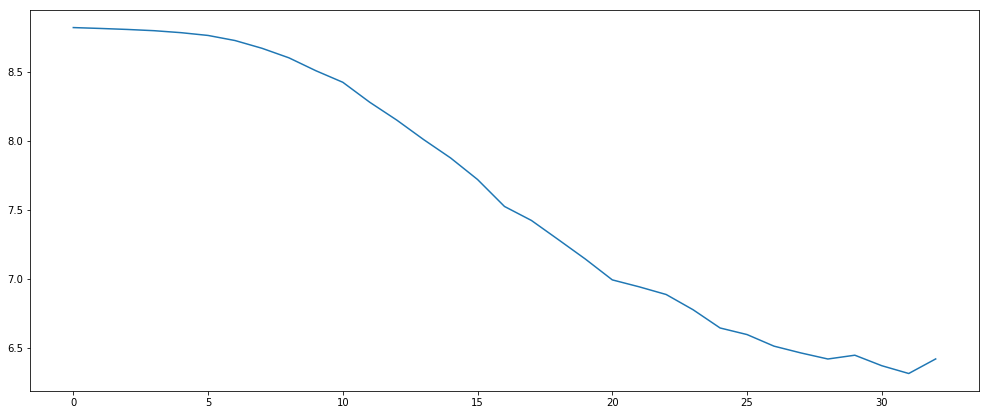

In [29]:
build_train(
    num_epochs=1,
    batch_size=128,
    rnn_size=128,
    embed_dim=128,
    seq_length=16,
    learning_rate=0.001,
    show_every_n_batches=10)

## Train
Train the neural network on the preprocessed data.  If you have a hard time getting a good loss, check the [forums](https://discussions.udacity.com/) to see if anyone is having the same problem.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
batches = get_batches(int_text, batch_size, seq_length)

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    
#     keep_prob =  tf.get_default_graph().get_tensor_by_name("keep_prob")

    for epoch_i in range(num_epochs):
        state = sess.run(initial_state, {input_text: batches[0][0]})

        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
#                 keep_prob: 0.5,
                lr: learning_rate}
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)

            # Show every <show_every_n_batches> batches
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_dir)
    print('Model Trained and Saved')

Epoch   0 Batch    0/33   train_loss = 8.822
Epoch   0 Batch   10/33   train_loss = 6.522
Epoch   0 Batch   20/33   train_loss = 6.476
Epoch   0 Batch   30/33   train_loss = 6.481
Epoch   1 Batch    7/33   train_loss = 6.161
Epoch   1 Batch   17/33   train_loss = 6.132
Epoch   1 Batch   27/33   train_loss = 6.209
Epoch   2 Batch    4/33   train_loss = 6.076
Epoch   2 Batch   14/33   train_loss = 6.232
Epoch   2 Batch   24/33   train_loss = 6.085
Epoch   3 Batch    1/33   train_loss = 6.000
Epoch   3 Batch   11/33   train_loss = 5.973
Epoch   3 Batch   21/33   train_loss = 6.177
Epoch   3 Batch   31/33   train_loss = 6.061
Epoch   4 Batch    8/33   train_loss = 6.056
Epoch   4 Batch   18/33   train_loss = 6.054
Epoch   4 Batch   28/33   train_loss = 6.023
Epoch   5 Batch    5/33   train_loss = 6.082
Epoch   5 Batch   15/33   train_loss = 5.937
Epoch   5 Batch   25/33   train_loss = 5.937
Epoch   6 Batch    2/33   train_loss = 5.769
Epoch   6 Batch   12/33   train_loss = 5.900
Epoch   6 

## Save Parameters
Save `seq_length` and `save_dir` for generating a new TV script.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Save parameters for checkpoint
helper.save_params((seq_length, save_dir))

NameError: name 'seq_length' is not defined

# Checkpoint

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import tensorflow as tf
import numpy as np
import helper
import problem_unittests as tests

_, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()
seq_length, load_dir = helper.load_params()

## Implement Generate Functions
### Get Tensors
Get tensors from `loaded_graph` using the function [`get_tensor_by_name()`](https://www.tensorflow.org/api_docs/python/tf/Graph#get_tensor_by_name).  Get the tensors using the following names:
- "input:0"
- "initial_state:0"
- "final_state:0"
- "probs:0"

Return the tensors in the following tuple `(InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor)` 

In [14]:
def get_tensors(loaded_graph):
    """
    Get input, initial state, final state, and probabilities tensor from <loaded_graph>
    :param loaded_graph: TensorFlow graph loaded from file
    :return: Tuple (InputTensor, InitialStateTensor, FinalStateTensor, ProbsTensor)
    """
    # TODO: Implement Function
    
    input_tensor = loaded_graph.get_tensor_by_name('input:0')
    initial_state_tensor = loaded_graph.get_tensor_by_name('initial_state:0')
    
    final_state_tensor = loaded_graph.get_tensor_by_name('final_state:0')
    
    probs_tensor = loaded_graph.get_tensor_by_name('probs:0')

    return (input_tensor, initial_state_tensor, final_state_tensor, probs_tensor)



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_get_tensors(get_tensors)

Tests Passed


### Choose Word
Implement the `pick_word()` function to select the next word using `probabilities`.

In [15]:
def pick_word(probabilities, int_to_vocab):
    """
    Pick the next word in the generated text
    :param probabilities: Probabilites of the next word
    :param int_to_vocab: Dictionary of word ids as the keys and words as the values
    :return: String of the predicted word
    """
    # TODO: Implement Function
    
#     print("char: ", int_to_vocab[np.argmax(probabilities)])
    return int_to_vocab[np.argmax(probabilities)]


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_pick_word(pick_word)

Tests Passed


In [16]:
# homer_simpson, moe_szyslak, or Barney_Gumble
def generate_script(gen_length = 250, prime_word = 'moe_szyslak'):
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        # Get Tensors from loaded model
        input_text, initial_state, final_state, probs = get_tensors(loaded_graph)

        # Sentences generation setup
        gen_sentences = [prime_word + ':']
        prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

        # Generate sentences
        for n in range(gen_length):
            # Dynamic Input
            dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
            dyn_seq_length = len(dyn_input[0])

            # Get Prediction
            probabilities, prev_state = sess.run(
                [probs, final_state],
                {input_text: dyn_input, initial_state: prev_state})

            pred_word = pick_word(probabilities[0][dyn_seq_length-1], int_to_vocab)

            gen_sentences.append(pred_word)

        # Remove tokens
        tv_script = ' '.join(gen_sentences)
        for key, token in token_dict.items():
            ending = ' ' if key in ['\n', '(', '"'] else ''
            tv_script = tv_script.replace(' ' + token.lower(), key)
        tv_script = tv_script.replace('\n ', '\n')
        tv_script = tv_script.replace('( ', '(')

        print(tv_script)

In [19]:
generate_script()

INFO:tensorflow:Restoring parameters from ./save
moe_szyslak:..........................................................................................................................................................................................................................................................


## Generate TV Script
This will generate the TV script for you.  Set `gen_length` to the length of TV script you want to generate.

In [5]:
gen_length = 250
# homer_simpson, moe_szyslak, or Barney_Gumble
prime_word = 'moe_szyslak'

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    input_text, initial_state, final_state, probs = get_tensors(loaded_graph)

    # Sentences generation setup
    gen_sentences = [prime_word + ':']
    prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

    # Generate sentences
    for n in range(gen_length):
        # Dynamic Input
        dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
        dyn_seq_length = len(dyn_input[0])

        # Get Prediction
        probabilities, prev_state = sess.run(
            [probs, final_state],
            {input_text: dyn_input, initial_state: prev_state})
        
        pred_word = pick_word(probabilities[0][dyn_seq_length-1], int_to_vocab)

        gen_sentences.append(pred_word)
    
    # Remove tokens
    tv_script = ' '.join(gen_sentences)
    for key, token in token_dict.items():
        ending = ' ' if key in ['\n', '(', '"'] else ''
        tv_script = tv_script.replace(' ' + token.lower(), key)
    tv_script = tv_script.replace('\n ', '\n')
    tv_script = tv_script.replace('( ', '(')
        
    print(tv_script)

INFO:tensorflow:Restoring parameters from ./save
moe_szyslak:(proudly) youuu got that right, my friend!
moe_szyslak: so, i loves you. what do you like to try your tab...
barney_gumble: how does i have to learn?
moe_szyslak:(shocked...............(second laugh)
moe_szyslak: okay, okay, it's paint.
moe_szyslak:(" duh") hey, hey is a good one, barney. i gotta have some more by that.
moe_szyslak: hey, you don't want to say to me.
homer_simpson:(excited) oh, you're a little girl we all should do we need to think and saw i have.
moe_szyslak: well, i am not the special marriage that had a guy like me. you got me!(hurt) bet you think i was just looked here.
moe_szyslak: hey, wait a minute-- this is the good day, homer. your lost or a strong in a fan.
moe_szyslak: yeah. now all right. i'm not a couple months and i'll be my life.
moe_szyslak: oh, i don't know anything out that bar is called him in?
homer_simpson: how do i think you're very sweet.
moe_szyslak: well, i love about, but i guess you'

# The TV Script is Nonsensical
It's ok if the TV script doesn't make any sense.  We trained on less than a megabyte of text.  In order to get good results, you'll have to use a smaller vocabulary or get more data.  Luckily there's more data!  As we mentioned in the beggining of this project, this is a subset of [another dataset](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data).  We didn't have you train on all the data, because that would take too long.  However, you are free to train your neural network on all the data.  After you complete the project, of course.
# Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_tv_script_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

Epoch   0 Batch    0/16   train_loss = 8.822
Epoch   0 Batch   10/16   train_loss = 6.328
Model Trained and Saved


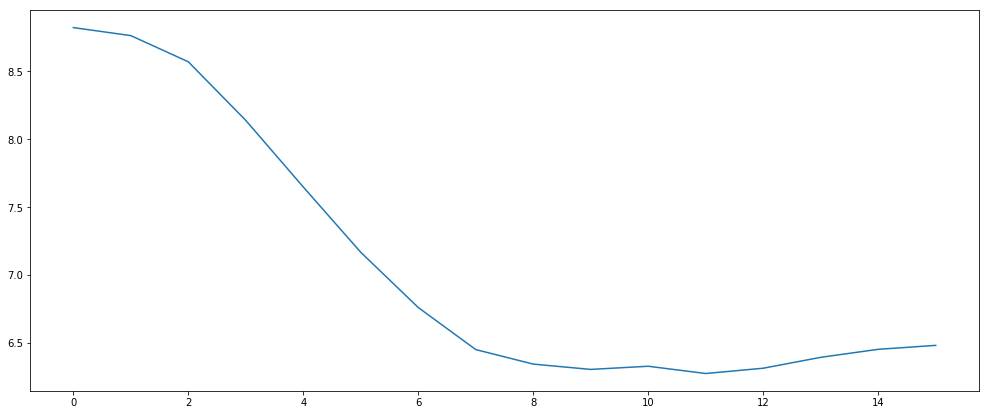

In [30]:
build_train(
    num_epochs=1,
    batch_size=128,
    rnn_size=512,
    embed_dim=256,
    seq_length=32,
    learning_rate=0.001,
    show_every_n_batches=10)

Epoch   0 Batch    0/33   train_loss = 8.821
Epoch   0 Batch   10/33   train_loss = 6.550
Epoch   0 Batch   20/33   train_loss = 6.495
Epoch   0 Batch   30/33   train_loss = 6.518
Epoch   1 Batch    7/33   train_loss = 6.172
Epoch   1 Batch   17/33   train_loss = 6.105
Epoch   1 Batch   27/33   train_loss = 6.178
Epoch   2 Batch    4/33   train_loss = 6.080
Epoch   2 Batch   14/33   train_loss = 6.198
Epoch   2 Batch   24/33   train_loss = 6.116
Epoch   3 Batch    1/33   train_loss = 5.992
Epoch   3 Batch   11/33   train_loss = 5.989
Epoch   3 Batch   21/33   train_loss = 6.143
Epoch   3 Batch   31/33   train_loss = 6.006
Epoch   4 Batch    8/33   train_loss = 6.021
Epoch   4 Batch   18/33   train_loss = 5.971
Epoch   4 Batch   28/33   train_loss = 5.939
Epoch   5 Batch    5/33   train_loss = 5.986
Epoch   5 Batch   15/33   train_loss = 5.890
Epoch   5 Batch   25/33   train_loss = 5.855
Epoch   6 Batch    2/33   train_loss = 5.687
Epoch   6 Batch   12/33   train_loss = 5.801
Epoch   6 

Epoch  55 Batch   15/33   train_loss = 1.931
Epoch  55 Batch   25/33   train_loss = 1.860
Epoch  56 Batch    2/33   train_loss = 1.903
Epoch  56 Batch   12/33   train_loss = 1.930
Epoch  56 Batch   22/33   train_loss = 1.822
Epoch  56 Batch   32/33   train_loss = 1.841
Epoch  57 Batch    9/33   train_loss = 1.815
Epoch  57 Batch   19/33   train_loss = 1.754
Epoch  57 Batch   29/33   train_loss = 1.811
Epoch  58 Batch    6/33   train_loss = 1.748
Epoch  58 Batch   16/33   train_loss = 1.737
Epoch  58 Batch   26/33   train_loss = 1.618
Epoch  59 Batch    3/33   train_loss = 1.615
Epoch  59 Batch   13/33   train_loss = 1.668
Epoch  59 Batch   23/33   train_loss = 1.603
Epoch  60 Batch    0/33   train_loss = 1.584
Epoch  60 Batch   10/33   train_loss = 1.558
Epoch  60 Batch   20/33   train_loss = 1.611
Epoch  60 Batch   30/33   train_loss = 1.535
Epoch  61 Batch    7/33   train_loss = 1.549
Epoch  61 Batch   17/33   train_loss = 1.497
Epoch  61 Batch   27/33   train_loss = 1.574
Epoch  62 

Epoch 110 Batch   30/33   train_loss = 0.220
Epoch 111 Batch    7/33   train_loss = 0.256
Epoch 111 Batch   17/33   train_loss = 0.230
Epoch 111 Batch   27/33   train_loss = 0.261
Epoch 112 Batch    4/33   train_loss = 0.216
Epoch 112 Batch   14/33   train_loss = 0.247
Epoch 112 Batch   24/33   train_loss = 0.216
Epoch 113 Batch    1/33   train_loss = 0.262
Epoch 113 Batch   11/33   train_loss = 0.225
Epoch 113 Batch   21/33   train_loss = 0.220
Epoch 113 Batch   31/33   train_loss = 0.226
Epoch 114 Batch    8/33   train_loss = 0.250
Epoch 114 Batch   18/33   train_loss = 0.213
Epoch 114 Batch   28/33   train_loss = 0.230
Epoch 115 Batch    5/33   train_loss = 0.235
Epoch 115 Batch   15/33   train_loss = 0.227
Epoch 115 Batch   25/33   train_loss = 0.215
Epoch 116 Batch    2/33   train_loss = 0.241
Epoch 116 Batch   12/33   train_loss = 0.229
Epoch 116 Batch   22/33   train_loss = 0.232
Epoch 116 Batch   32/33   train_loss = 0.244
Epoch 117 Batch    9/33   train_loss = 0.229
Epoch 117 

Epoch 166 Batch   12/33   train_loss = 0.203
Epoch 166 Batch   22/33   train_loss = 0.206
Epoch 166 Batch   32/33   train_loss = 0.220
Epoch 167 Batch    9/33   train_loss = 0.201
Epoch 167 Batch   19/33   train_loss = 0.210
Epoch 167 Batch   29/33   train_loss = 0.219
Epoch 168 Batch    6/33   train_loss = 0.209
Epoch 168 Batch   16/33   train_loss = 0.198
Epoch 168 Batch   26/33   train_loss = 0.187
Epoch 169 Batch    3/33   train_loss = 0.194
Epoch 169 Batch   13/33   train_loss = 0.218
Epoch 169 Batch   23/33   train_loss = 0.189
Epoch 170 Batch    0/33   train_loss = 0.190
Epoch 170 Batch   10/33   train_loss = 0.199
Epoch 170 Batch   20/33   train_loss = 0.221
Epoch 170 Batch   30/33   train_loss = 0.182
Epoch 171 Batch    7/33   train_loss = 0.217
Epoch 171 Batch   17/33   train_loss = 0.187
Epoch 171 Batch   27/33   train_loss = 0.223
Epoch 172 Batch    4/33   train_loss = 0.185
Epoch 172 Batch   14/33   train_loss = 0.214
Epoch 172 Batch   24/33   train_loss = 0.182
Epoch 173 

Epoch 221 Batch   27/33   train_loss = 0.223
Epoch 222 Batch    4/33   train_loss = 0.184
Epoch 222 Batch   14/33   train_loss = 0.213
Epoch 222 Batch   24/33   train_loss = 0.181
Epoch 223 Batch    1/33   train_loss = 0.227
Epoch 223 Batch   11/33   train_loss = 0.193
Epoch 223 Batch   21/33   train_loss = 0.187
Epoch 223 Batch   31/33   train_loss = 0.193
Epoch 224 Batch    8/33   train_loss = 0.210
Epoch 224 Batch   18/33   train_loss = 0.180
Epoch 224 Batch   28/33   train_loss = 0.199
Epoch 225 Batch    5/33   train_loss = 0.201
Epoch 225 Batch   15/33   train_loss = 0.195
Epoch 225 Batch   25/33   train_loss = 0.184
Epoch 226 Batch    2/33   train_loss = 0.209
Epoch 226 Batch   12/33   train_loss = 0.198
Epoch 226 Batch   22/33   train_loss = 0.203
Epoch 226 Batch   32/33   train_loss = 0.216
Epoch 227 Batch    9/33   train_loss = 0.197
Epoch 227 Batch   19/33   train_loss = 0.205
Epoch 227 Batch   29/33   train_loss = 0.215
Epoch 228 Batch    6/33   train_loss = 0.205
Epoch 228 

Epoch 277 Batch    9/33   train_loss = 0.193
Epoch 277 Batch   19/33   train_loss = 0.201
Epoch 277 Batch   29/33   train_loss = 0.211
Epoch 278 Batch    6/33   train_loss = 0.201
Epoch 278 Batch   16/33   train_loss = 0.189
Epoch 278 Batch   26/33   train_loss = 0.179
Epoch 279 Batch    3/33   train_loss = 0.187
Epoch 279 Batch   13/33   train_loss = 0.209
Epoch 279 Batch   23/33   train_loss = 0.182
Epoch 280 Batch    0/33   train_loss = 0.181
Epoch 280 Batch   10/33   train_loss = 0.191
Epoch 280 Batch   20/33   train_loss = 0.212
Epoch 280 Batch   30/33   train_loss = 0.173
Epoch 281 Batch    7/33   train_loss = 0.211
Epoch 281 Batch   17/33   train_loss = 0.180
Epoch 281 Batch   27/33   train_loss = 0.215
Epoch 282 Batch    4/33   train_loss = 0.177
Epoch 282 Batch   14/33   train_loss = 0.206
Epoch 282 Batch   24/33   train_loss = 0.175
Epoch 283 Batch    1/33   train_loss = 0.221
Epoch 283 Batch   11/33   train_loss = 0.188
Epoch 283 Batch   21/33   train_loss = 0.182
Epoch 283 

Epoch 332 Batch   24/33   train_loss = 0.174
Epoch 333 Batch    1/33   train_loss = 0.219
Epoch 333 Batch   11/33   train_loss = 0.186
Epoch 333 Batch   21/33   train_loss = 0.180
Epoch 333 Batch   31/33   train_loss = 0.186
Epoch 334 Batch    8/33   train_loss = 0.203
Epoch 334 Batch   18/33   train_loss = 0.173
Epoch 334 Batch   28/33   train_loss = 0.193
Epoch 335 Batch    5/33   train_loss = 0.194
Epoch 335 Batch   15/33   train_loss = 0.189
Epoch 335 Batch   25/33   train_loss = 0.178
Epoch 336 Batch    2/33   train_loss = 0.203
Epoch 336 Batch   12/33   train_loss = 0.191
Epoch 336 Batch   22/33   train_loss = 0.197
Epoch 336 Batch   32/33   train_loss = 0.210
Epoch 337 Batch    9/33   train_loss = 0.191
Epoch 337 Batch   19/33   train_loss = 0.199
Epoch 337 Batch   29/33   train_loss = 0.209
Epoch 338 Batch    6/33   train_loss = 0.199
Epoch 338 Batch   16/33   train_loss = 0.187
Epoch 338 Batch   26/33   train_loss = 0.178
Epoch 339 Batch    3/33   train_loss = 0.185
Epoch 339 

Epoch 388 Batch    6/33   train_loss = 0.198
Epoch 388 Batch   16/33   train_loss = 0.186
Epoch 388 Batch   26/33   train_loss = 0.177
Epoch 389 Batch    3/33   train_loss = 0.184
Epoch 389 Batch   13/33   train_loss = 0.205
Epoch 389 Batch   23/33   train_loss = 0.179
Epoch 390 Batch    0/33   train_loss = 0.178
Epoch 390 Batch   10/33   train_loss = 0.188
Epoch 390 Batch   20/33   train_loss = 0.209
Epoch 390 Batch   30/33   train_loss = 0.170
Epoch 391 Batch    7/33   train_loss = 0.208
Epoch 391 Batch   17/33   train_loss = 0.177
Epoch 391 Batch   27/33   train_loss = 0.212
Epoch 392 Batch    4/33   train_loss = 0.175
Epoch 392 Batch   14/33   train_loss = 0.203
Epoch 392 Batch   24/33   train_loss = 0.172
Epoch 393 Batch    1/33   train_loss = 0.218
Epoch 393 Batch   11/33   train_loss = 0.185
Epoch 393 Batch   21/33   train_loss = 0.179
Epoch 393 Batch   31/33   train_loss = 0.184
Epoch 394 Batch    8/33   train_loss = 0.202
Epoch 394 Batch   18/33   train_loss = 0.172
Epoch 394 

Epoch 443 Batch   21/33   train_loss = 0.179
Epoch 443 Batch   31/33   train_loss = 0.185
Epoch 444 Batch    8/33   train_loss = 0.202
Epoch 444 Batch   18/33   train_loss = 0.173
Epoch 444 Batch   28/33   train_loss = 0.192
Epoch 445 Batch    5/33   train_loss = 0.193
Epoch 445 Batch   15/33   train_loss = 0.188
Epoch 445 Batch   25/33   train_loss = 0.177
Epoch 446 Batch    2/33   train_loss = 0.201
Epoch 446 Batch   12/33   train_loss = 0.190
Epoch 446 Batch   22/33   train_loss = 0.196
Epoch 446 Batch   32/33   train_loss = 0.209
Epoch 447 Batch    9/33   train_loss = 0.190
Epoch 447 Batch   19/33   train_loss = 0.198
Epoch 447 Batch   29/33   train_loss = 0.207
Epoch 448 Batch    6/33   train_loss = 0.198
Epoch 448 Batch   16/33   train_loss = 0.186
Epoch 448 Batch   26/33   train_loss = 0.177
Epoch 449 Batch    3/33   train_loss = 0.184
Epoch 449 Batch   13/33   train_loss = 0.205
Epoch 449 Batch   23/33   train_loss = 0.179
Epoch 450 Batch    0/33   train_loss = 0.178
Epoch 450 

Epoch 499 Batch    3/33   train_loss = 0.182
Epoch 499 Batch   13/33   train_loss = 0.204
Epoch 499 Batch   23/33   train_loss = 0.178
Epoch 500 Batch    0/33   train_loss = 0.177
Epoch 500 Batch   10/33   train_loss = 0.187
Epoch 500 Batch   20/33   train_loss = 0.208
Epoch 500 Batch   30/33   train_loss = 0.169
Epoch 501 Batch    7/33   train_loss = 0.206
Epoch 501 Batch   17/33   train_loss = 0.176
Epoch 501 Batch   27/33   train_loss = 0.210
Epoch 502 Batch    4/33   train_loss = 0.174
Epoch 502 Batch   14/33   train_loss = 0.202
Epoch 502 Batch   24/33   train_loss = 0.171
Epoch 503 Batch    1/33   train_loss = 0.217
Epoch 503 Batch   11/33   train_loss = 0.183
Epoch 503 Batch   21/33   train_loss = 0.178
Epoch 503 Batch   31/33   train_loss = 0.183
Epoch 504 Batch    8/33   train_loss = 0.201
Epoch 504 Batch   18/33   train_loss = 0.171
Epoch 504 Batch   28/33   train_loss = 0.190
Epoch 505 Batch    5/33   train_loss = 0.192
Epoch 505 Batch   15/33   train_loss = 0.186
Epoch 505 

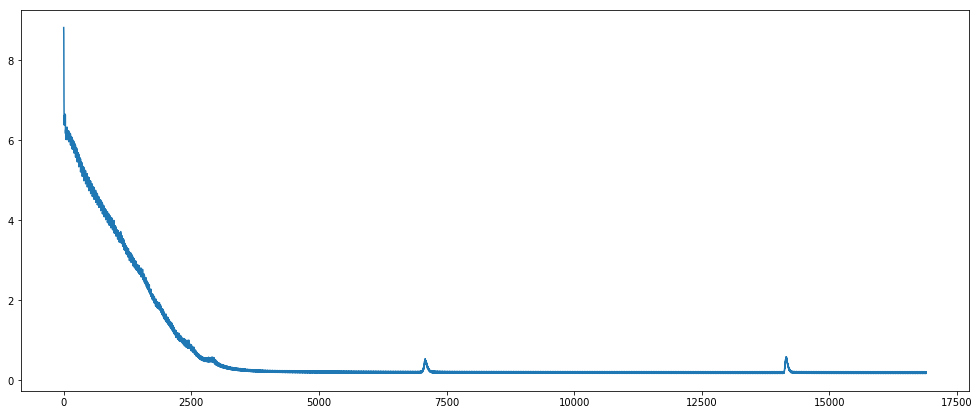

In [31]:
build_train(
    num_epochs=512,
    batch_size=128,
    rnn_size=512,
    embed_dim=256,
    seq_length=16,
    learning_rate=0.001,
    show_every_n_batches=10)

In [32]:
generate_script()

INFO:tensorflow:Restoring parameters from ./save
moe_szyslak:(lifts index finger) to the scooter store!
moe_szyslak: i did not think i should get drunk to the most
homer_simpson: so, what are you doing it, so.(belches)
moe_szyslak: ah, thanks, lenny. if you didn't get back to school?
lenny_leonard: what are you gonna do?
chief_wiggum:(tipsy) there is a domestic job on a" flaming moe"?


moe_szyslak: yeah, you gotta take us off and a little more more to the pretty girl i don't wanna go up. i'm gonna have to show him the kids.
bart_simpson: i'm right.
carl_carlson: yeah.
homer_simpson: yes. first name, rotch.
homer_simpson:(absentmindedly going through) it's sure!
dr. _montgomery_burns: that's great. homie, uh, lucky kind of sexy can do something about it.
homer_simpson:(excited) to see, homer... marge.
moe_szyslak: huh? oh yeah.
moe_szyslak:(generously) aw, homer.
homer_simpson:(inanely beer)
homer_simpson: sorry, moe.
moe_szyslak: eh, sorry, moe.
homer_simpson: i was just tellin' the d

Epoch   0 Batch    0/33   train_loss = 8.821
Epoch   0 Batch   10/33   train_loss = 7.162
Epoch   0 Batch   20/33   train_loss = 6.371
Epoch   0 Batch   30/33   train_loss = 6.426
Epoch   1 Batch    7/33   train_loss = 6.263
Epoch   1 Batch   17/33   train_loss = 6.123
Epoch   1 Batch   27/33   train_loss = 6.165
Epoch   2 Batch    4/33   train_loss = 6.073
Epoch   2 Batch   14/33   train_loss = 6.158
Epoch   2 Batch   24/33   train_loss = 6.101
Epoch   3 Batch    1/33   train_loss = 5.977
Epoch   3 Batch   11/33   train_loss = 6.009
Epoch   3 Batch   21/33   train_loss = 6.142
Epoch   3 Batch   31/33   train_loss = 6.046
Epoch   4 Batch    8/33   train_loss = 6.062
Epoch   4 Batch   18/33   train_loss = 6.036
Epoch   4 Batch   28/33   train_loss = 6.030
Epoch   5 Batch    5/33   train_loss = 6.052
Epoch   5 Batch   15/33   train_loss = 5.966
Epoch   5 Batch   25/33   train_loss = 5.951
Epoch   6 Batch    2/33   train_loss = 5.777
Epoch   6 Batch   12/33   train_loss = 5.888
Epoch   6 

Epoch  55 Batch   15/33   train_loss = 3.816
Epoch  55 Batch   25/33   train_loss = 3.882
Epoch  56 Batch    2/33   train_loss = 3.775
Epoch  56 Batch   12/33   train_loss = 3.846
Epoch  56 Batch   22/33   train_loss = 3.897
Epoch  56 Batch   32/33   train_loss = 3.917
Epoch  57 Batch    9/33   train_loss = 3.782
Epoch  57 Batch   19/33   train_loss = 3.738
Epoch  57 Batch   29/33   train_loss = 3.790
Epoch  58 Batch    6/33   train_loss = 3.791
Epoch  58 Batch   16/33   train_loss = 3.793
Epoch  58 Batch   26/33   train_loss = 3.725
Epoch  59 Batch    3/33   train_loss = 3.669
Epoch  59 Batch   13/33   train_loss = 3.802
Epoch  59 Batch   23/33   train_loss = 3.786
Epoch  60 Batch    0/33   train_loss = 3.618
Epoch  60 Batch   10/33   train_loss = 3.782
Epoch  60 Batch   20/33   train_loss = 3.707
Epoch  60 Batch   30/33   train_loss = 3.743
Epoch  61 Batch    7/33   train_loss = 3.752
Epoch  61 Batch   17/33   train_loss = 3.806
Epoch  61 Batch   27/33   train_loss = 3.773
Epoch  62 

Epoch 110 Batch   30/33   train_loss = 1.952
Epoch 111 Batch    7/33   train_loss = 1.891
Epoch 111 Batch   17/33   train_loss = 1.946
Epoch 111 Batch   27/33   train_loss = 2.051
Epoch 112 Batch    4/33   train_loss = 1.844
Epoch 112 Batch   14/33   train_loss = 1.833
Epoch 112 Batch   24/33   train_loss = 1.901
Epoch 113 Batch    1/33   train_loss = 1.890
Epoch 113 Batch   11/33   train_loss = 1.799
Epoch 113 Batch   21/33   train_loss = 1.833
Epoch 113 Batch   31/33   train_loss = 1.824
Epoch 114 Batch    8/33   train_loss = 1.831
Epoch 114 Batch   18/33   train_loss = 1.775
Epoch 114 Batch   28/33   train_loss = 1.814
Epoch 115 Batch    5/33   train_loss = 1.836
Epoch 115 Batch   15/33   train_loss = 1.761
Epoch 115 Batch   25/33   train_loss = 1.781
Epoch 116 Batch    2/33   train_loss = 1.828
Epoch 116 Batch   12/33   train_loss = 1.818
Epoch 116 Batch   22/33   train_loss = 1.747
Epoch 116 Batch   32/33   train_loss = 1.765
Epoch 117 Batch    9/33   train_loss = 1.763
Epoch 117 

Epoch 166 Batch   12/33   train_loss = 0.613
Epoch 166 Batch   22/33   train_loss = 0.619
Epoch 166 Batch   32/33   train_loss = 0.661
Epoch 167 Batch    9/33   train_loss = 0.616
Epoch 167 Batch   19/33   train_loss = 0.564
Epoch 167 Batch   29/33   train_loss = 0.620
Epoch 168 Batch    6/33   train_loss = 0.607
Epoch 168 Batch   16/33   train_loss = 0.621
Epoch 168 Batch   26/33   train_loss = 0.581
Epoch 169 Batch    3/33   train_loss = 0.566
Epoch 169 Batch   13/33   train_loss = 0.625
Epoch 169 Batch   23/33   train_loss = 0.539
Epoch 170 Batch    0/33   train_loss = 0.547
Epoch 170 Batch   10/33   train_loss = 0.537
Epoch 170 Batch   20/33   train_loss = 0.584
Epoch 170 Batch   30/33   train_loss = 0.557
Epoch 171 Batch    7/33   train_loss = 0.578
Epoch 171 Batch   17/33   train_loss = 0.521
Epoch 171 Batch   27/33   train_loss = 0.598
Epoch 172 Batch    4/33   train_loss = 0.488
Epoch 172 Batch   14/33   train_loss = 0.543
Epoch 172 Batch   24/33   train_loss = 0.544
Epoch 173 

Epoch 221 Batch   27/33   train_loss = 0.268
Epoch 222 Batch    4/33   train_loss = 0.222
Epoch 222 Batch   14/33   train_loss = 0.258
Epoch 222 Batch   24/33   train_loss = 0.225
Epoch 223 Batch    1/33   train_loss = 0.274
Epoch 223 Batch   11/33   train_loss = 0.233
Epoch 223 Batch   21/33   train_loss = 0.226
Epoch 223 Batch   31/33   train_loss = 0.232
Epoch 224 Batch    8/33   train_loss = 0.261
Epoch 224 Batch   18/33   train_loss = 0.220
Epoch 224 Batch   28/33   train_loss = 0.237
Epoch 225 Batch    5/33   train_loss = 0.245
Epoch 225 Batch   15/33   train_loss = 0.235
Epoch 225 Batch   25/33   train_loss = 0.220
Epoch 226 Batch    2/33   train_loss = 0.249
Epoch 226 Batch   12/33   train_loss = 0.239
Epoch 226 Batch   22/33   train_loss = 0.237
Epoch 226 Batch   32/33   train_loss = 0.255
Epoch 227 Batch    9/33   train_loss = 0.241
Epoch 227 Batch   19/33   train_loss = 0.246
Epoch 227 Batch   29/33   train_loss = 0.255
Epoch 228 Batch    6/33   train_loss = 0.237
Epoch 228 

Epoch 277 Batch    9/33   train_loss = 0.211
Epoch 277 Batch   19/33   train_loss = 0.215
Epoch 277 Batch   29/33   train_loss = 0.230
Epoch 278 Batch    6/33   train_loss = 0.213
Epoch 278 Batch   16/33   train_loss = 0.204
Epoch 278 Batch   26/33   train_loss = 0.194
Epoch 279 Batch    3/33   train_loss = 0.199
Epoch 279 Batch   13/33   train_loss = 0.236
Epoch 279 Batch   23/33   train_loss = 0.202
Epoch 280 Batch    0/33   train_loss = 0.197
Epoch 280 Batch   10/33   train_loss = 0.202
Epoch 280 Batch   20/33   train_loss = 0.224
Epoch 280 Batch   30/33   train_loss = 0.188
Epoch 281 Batch    7/33   train_loss = 0.223
Epoch 281 Batch   17/33   train_loss = 0.195
Epoch 281 Batch   27/33   train_loss = 0.229
Epoch 282 Batch    4/33   train_loss = 0.192
Epoch 282 Batch   14/33   train_loss = 0.220
Epoch 282 Batch   24/33   train_loss = 0.190
Epoch 283 Batch    1/33   train_loss = 0.234
Epoch 283 Batch   11/33   train_loss = 0.200
Epoch 283 Batch   21/33   train_loss = 0.196
Epoch 283 

Epoch 332 Batch   24/33   train_loss = 0.182
Epoch 333 Batch    1/33   train_loss = 0.226
Epoch 333 Batch   11/33   train_loss = 0.192
Epoch 333 Batch   21/33   train_loss = 0.186
Epoch 333 Batch   31/33   train_loss = 0.191
Epoch 334 Batch    8/33   train_loss = 0.209
Epoch 334 Batch   18/33   train_loss = 0.179
Epoch 334 Batch   28/33   train_loss = 0.197
Epoch 335 Batch    5/33   train_loss = 0.201
Epoch 335 Batch   15/33   train_loss = 0.193
Epoch 335 Batch   25/33   train_loss = 0.183
Epoch 336 Batch    2/33   train_loss = 0.207
Epoch 336 Batch   12/33   train_loss = 0.196
Epoch 336 Batch   22/33   train_loss = 0.202
Epoch 336 Batch   32/33   train_loss = 0.213
Epoch 337 Batch    9/33   train_loss = 0.196
Epoch 337 Batch   19/33   train_loss = 0.202
Epoch 337 Batch   29/33   train_loss = 0.214
Epoch 338 Batch    6/33   train_loss = 0.202
Epoch 338 Batch   16/33   train_loss = 0.190
Epoch 338 Batch   26/33   train_loss = 0.183
Epoch 339 Batch    3/33   train_loss = 0.187
Epoch 339 

Epoch 388 Batch    6/33   train_loss = 0.198
Epoch 388 Batch   16/33   train_loss = 0.186
Epoch 388 Batch   26/33   train_loss = 0.177
Epoch 389 Batch    3/33   train_loss = 0.184
Epoch 389 Batch   13/33   train_loss = 0.205
Epoch 389 Batch   23/33   train_loss = 0.180
Epoch 390 Batch    0/33   train_loss = 0.179
Epoch 390 Batch   10/33   train_loss = 0.188
Epoch 390 Batch   20/33   train_loss = 0.209
Epoch 390 Batch   30/33   train_loss = 0.170
Epoch 391 Batch    7/33   train_loss = 0.208
Epoch 391 Batch   17/33   train_loss = 0.177
Epoch 391 Batch   27/33   train_loss = 0.212
Epoch 392 Batch    4/33   train_loss = 0.176
Epoch 392 Batch   14/33   train_loss = 0.203
Epoch 392 Batch   24/33   train_loss = 0.173
Epoch 393 Batch    1/33   train_loss = 0.217
Epoch 393 Batch   11/33   train_loss = 0.185
Epoch 393 Batch   21/33   train_loss = 0.179
Epoch 393 Batch   31/33   train_loss = 0.185
Epoch 394 Batch    8/33   train_loss = 0.203
Epoch 394 Batch   18/33   train_loss = 0.173
Epoch 394 

Epoch 443 Batch   21/33   train_loss = 0.178
Epoch 443 Batch   31/33   train_loss = 0.184
Epoch 444 Batch    8/33   train_loss = 0.202
Epoch 444 Batch   18/33   train_loss = 0.172
Epoch 444 Batch   28/33   train_loss = 0.190
Epoch 445 Batch    5/33   train_loss = 0.193
Epoch 445 Batch   15/33   train_loss = 0.187
Epoch 445 Batch   25/33   train_loss = 0.177
Epoch 446 Batch    2/33   train_loss = 0.201
Epoch 446 Batch   12/33   train_loss = 0.189
Epoch 446 Batch   22/33   train_loss = 0.195
Epoch 446 Batch   32/33   train_loss = 0.208
Epoch 447 Batch    9/33   train_loss = 0.189
Epoch 447 Batch   19/33   train_loss = 0.197
Epoch 447 Batch   29/33   train_loss = 0.208
Epoch 448 Batch    6/33   train_loss = 0.198
Epoch 448 Batch   16/33   train_loss = 0.186
Epoch 448 Batch   26/33   train_loss = 0.176
Epoch 449 Batch    3/33   train_loss = 0.183
Epoch 449 Batch   13/33   train_loss = 0.204
Epoch 449 Batch   23/33   train_loss = 0.179
Epoch 450 Batch    0/33   train_loss = 0.178
Epoch 450 

Epoch 499 Batch    3/33   train_loss = 0.181
Epoch 499 Batch   13/33   train_loss = 0.202
Epoch 499 Batch   23/33   train_loss = 0.177
Epoch 500 Batch    0/33   train_loss = 0.176
Epoch 500 Batch   10/33   train_loss = 0.185
Epoch 500 Batch   20/33   train_loss = 0.206
Epoch 500 Batch   30/33   train_loss = 0.167
Epoch 501 Batch    7/33   train_loss = 0.205
Epoch 501 Batch   17/33   train_loss = 0.174
Epoch 501 Batch   27/33   train_loss = 0.209
Epoch 502 Batch    4/33   train_loss = 0.173
Epoch 502 Batch   14/33   train_loss = 0.200
Epoch 502 Batch   24/33   train_loss = 0.170
Epoch 503 Batch    1/33   train_loss = 0.214
Epoch 503 Batch   11/33   train_loss = 0.182
Epoch 503 Batch   21/33   train_loss = 0.176
Epoch 503 Batch   31/33   train_loss = 0.182
Epoch 504 Batch    8/33   train_loss = 0.200
Epoch 504 Batch   18/33   train_loss = 0.170
Epoch 504 Batch   28/33   train_loss = 0.189
Epoch 505 Batch    5/33   train_loss = 0.191
Epoch 505 Batch   15/33   train_loss = 0.185
Epoch 505 

Epoch 554 Batch   18/33   train_loss = 0.170
Epoch 554 Batch   28/33   train_loss = 0.188
Epoch 555 Batch    5/33   train_loss = 0.190
Epoch 555 Batch   15/33   train_loss = 0.184
Epoch 555 Batch   25/33   train_loss = 0.174
Epoch 556 Batch    2/33   train_loss = 0.198
Epoch 556 Batch   12/33   train_loss = 0.187
Epoch 556 Batch   22/33   train_loss = 0.193
Epoch 556 Batch   32/33   train_loss = 0.205
Epoch 557 Batch    9/33   train_loss = 0.187
Epoch 557 Batch   19/33   train_loss = 0.195
Epoch 557 Batch   29/33   train_loss = 0.205
Epoch 558 Batch    6/33   train_loss = 0.195
Epoch 558 Batch   16/33   train_loss = 0.183
Epoch 558 Batch   26/33   train_loss = 0.174
Epoch 559 Batch    3/33   train_loss = 0.180
Epoch 559 Batch   13/33   train_loss = 0.201
Epoch 559 Batch   23/33   train_loss = 0.176
Epoch 560 Batch    0/33   train_loss = 0.175
Epoch 560 Batch   10/33   train_loss = 0.184
Epoch 560 Batch   20/33   train_loss = 0.206
Epoch 560 Batch   30/33   train_loss = 0.167
Epoch 561 

Epoch 610 Batch    0/33   train_loss = 0.175
Epoch 610 Batch   10/33   train_loss = 0.184
Epoch 610 Batch   20/33   train_loss = 0.205
Epoch 610 Batch   30/33   train_loss = 0.166
Epoch 611 Batch    7/33   train_loss = 0.204
Epoch 611 Batch   17/33   train_loss = 0.173
Epoch 611 Batch   27/33   train_loss = 0.208
Epoch 612 Batch    4/33   train_loss = 0.172
Epoch 612 Batch   14/33   train_loss = 0.199
Epoch 612 Batch   24/33   train_loss = 0.169
Epoch 613 Batch    1/33   train_loss = 0.213
Epoch 613 Batch   11/33   train_loss = 0.181
Epoch 613 Batch   21/33   train_loss = 0.175
Epoch 613 Batch   31/33   train_loss = 0.181
Epoch 614 Batch    8/33   train_loss = 0.199
Epoch 614 Batch   18/33   train_loss = 0.169
Epoch 614 Batch   28/33   train_loss = 0.188
Epoch 615 Batch    5/33   train_loss = 0.190
Epoch 615 Batch   15/33   train_loss = 0.184
Epoch 615 Batch   25/33   train_loss = 0.174
Epoch 616 Batch    2/33   train_loss = 0.198
Epoch 616 Batch   12/33   train_loss = 0.186
Epoch 616 

Epoch 665 Batch   15/33   train_loss = 0.183
Epoch 665 Batch   25/33   train_loss = 0.173
Epoch 666 Batch    2/33   train_loss = 0.197
Epoch 666 Batch   12/33   train_loss = 0.186
Epoch 666 Batch   22/33   train_loss = 0.191
Epoch 666 Batch   32/33   train_loss = 0.204
Epoch 667 Batch    9/33   train_loss = 0.186
Epoch 667 Batch   19/33   train_loss = 0.194
Epoch 667 Batch   29/33   train_loss = 0.204
Epoch 668 Batch    6/33   train_loss = 0.194
Epoch 668 Batch   16/33   train_loss = 0.182
Epoch 668 Batch   26/33   train_loss = 0.173
Epoch 669 Batch    3/33   train_loss = 0.179
Epoch 669 Batch   13/33   train_loss = 0.200
Epoch 669 Batch   23/33   train_loss = 0.175
Epoch 670 Batch    0/33   train_loss = 0.174
Epoch 670 Batch   10/33   train_loss = 0.183
Epoch 670 Batch   20/33   train_loss = 0.204
Epoch 670 Batch   30/33   train_loss = 0.166
Epoch 671 Batch    7/33   train_loss = 0.203
Epoch 671 Batch   17/33   train_loss = 0.173
Epoch 671 Batch   27/33   train_loss = 0.207
Epoch 672 

Epoch 720 Batch   30/33   train_loss = 0.165
Epoch 721 Batch    7/33   train_loss = 0.203
Epoch 721 Batch   17/33   train_loss = 0.172
Epoch 721 Batch   27/33   train_loss = 0.206
Epoch 722 Batch    4/33   train_loss = 0.171
Epoch 722 Batch   14/33   train_loss = 0.198
Epoch 722 Batch   24/33   train_loss = 0.168
Epoch 723 Batch    1/33   train_loss = 0.212
Epoch 723 Batch   11/33   train_loss = 0.180
Epoch 723 Batch   21/33   train_loss = 0.174
Epoch 723 Batch   31/33   train_loss = 0.180
Epoch 724 Batch    8/33   train_loss = 0.198
Epoch 724 Batch   18/33   train_loss = 0.168
Epoch 724 Batch   28/33   train_loss = 0.187
Epoch 725 Batch    5/33   train_loss = 0.188
Epoch 725 Batch   15/33   train_loss = 0.183
Epoch 725 Batch   25/33   train_loss = 0.173
Epoch 726 Batch    2/33   train_loss = 0.197
Epoch 726 Batch   12/33   train_loss = 0.186
Epoch 726 Batch   22/33   train_loss = 0.191
Epoch 726 Batch   32/33   train_loss = 0.204
Epoch 727 Batch    9/33   train_loss = 0.186
Epoch 727 

Epoch 776 Batch   12/33   train_loss = 0.184
Epoch 776 Batch   22/33   train_loss = 0.190
Epoch 776 Batch   32/33   train_loss = 0.203
Epoch 777 Batch    9/33   train_loss = 0.184
Epoch 777 Batch   19/33   train_loss = 0.192
Epoch 777 Batch   29/33   train_loss = 0.203
Epoch 778 Batch    6/33   train_loss = 0.193
Epoch 778 Batch   16/33   train_loss = 0.181
Epoch 778 Batch   26/33   train_loss = 0.172
Epoch 779 Batch    3/33   train_loss = 0.178
Epoch 779 Batch   13/33   train_loss = 0.199
Epoch 779 Batch   23/33   train_loss = 0.174
Epoch 780 Batch    0/33   train_loss = 0.174
Epoch 780 Batch   10/33   train_loss = 0.182
Epoch 780 Batch   20/33   train_loss = 0.203
Epoch 780 Batch   30/33   train_loss = 0.165
Epoch 781 Batch    7/33   train_loss = 0.202
Epoch 781 Batch   17/33   train_loss = 0.171
Epoch 781 Batch   27/33   train_loss = 0.206
Epoch 782 Batch    4/33   train_loss = 0.170
Epoch 782 Batch   14/33   train_loss = 0.197
Epoch 782 Batch   24/33   train_loss = 0.167
Epoch 783 

Epoch 831 Batch   27/33   train_loss = 0.206
Epoch 832 Batch    4/33   train_loss = 0.170
Epoch 832 Batch   14/33   train_loss = 0.197
Epoch 832 Batch   24/33   train_loss = 0.167
Epoch 833 Batch    1/33   train_loss = 0.211
Epoch 833 Batch   11/33   train_loss = 0.179
Epoch 833 Batch   21/33   train_loss = 0.174
Epoch 833 Batch   31/33   train_loss = 0.179
Epoch 834 Batch    8/33   train_loss = 0.197
Epoch 834 Batch   18/33   train_loss = 0.167
Epoch 834 Batch   28/33   train_loss = 0.186
Epoch 835 Batch    5/33   train_loss = 0.188
Epoch 835 Batch   15/33   train_loss = 0.182
Epoch 835 Batch   25/33   train_loss = 0.172
Epoch 836 Batch    2/33   train_loss = 0.196
Epoch 836 Batch   12/33   train_loss = 0.184
Epoch 836 Batch   22/33   train_loss = 0.190
Epoch 836 Batch   32/33   train_loss = 0.203
Epoch 837 Batch    9/33   train_loss = 0.184
Epoch 837 Batch   19/33   train_loss = 0.192
Epoch 837 Batch   29/33   train_loss = 0.203
Epoch 838 Batch    6/33   train_loss = 0.193
Epoch 838 

Epoch 887 Batch    9/33   train_loss = 0.184
Epoch 887 Batch   19/33   train_loss = 0.192
Epoch 887 Batch   29/33   train_loss = 0.203
Epoch 888 Batch    6/33   train_loss = 0.193
Epoch 888 Batch   16/33   train_loss = 0.181
Epoch 888 Batch   26/33   train_loss = 0.172
Epoch 889 Batch    3/33   train_loss = 0.178
Epoch 889 Batch   13/33   train_loss = 0.199
Epoch 889 Batch   23/33   train_loss = 0.174
Epoch 890 Batch    0/33   train_loss = 0.173
Epoch 890 Batch   10/33   train_loss = 0.182
Epoch 890 Batch   20/33   train_loss = 0.203
Epoch 890 Batch   30/33   train_loss = 0.164
Epoch 891 Batch    7/33   train_loss = 0.202
Epoch 891 Batch   17/33   train_loss = 0.171
Epoch 891 Batch   27/33   train_loss = 0.205
Epoch 892 Batch    4/33   train_loss = 0.170
Epoch 892 Batch   14/33   train_loss = 0.197
Epoch 892 Batch   24/33   train_loss = 0.167
Epoch 893 Batch    1/33   train_loss = 0.211
Epoch 893 Batch   11/33   train_loss = 0.179
Epoch 893 Batch   21/33   train_loss = 0.173
Epoch 893 

Epoch 942 Batch   24/33   train_loss = 0.167
Epoch 943 Batch    1/33   train_loss = 0.211
Epoch 943 Batch   11/33   train_loss = 0.179
Epoch 943 Batch   21/33   train_loss = 0.173
Epoch 943 Batch   31/33   train_loss = 0.179
Epoch 944 Batch    8/33   train_loss = 0.197
Epoch 944 Batch   18/33   train_loss = 0.167
Epoch 944 Batch   28/33   train_loss = 0.185
Epoch 945 Batch    5/33   train_loss = 0.187
Epoch 945 Batch   15/33   train_loss = 0.182
Epoch 945 Batch   25/33   train_loss = 0.171
Epoch 946 Batch    2/33   train_loss = 0.195
Epoch 946 Batch   12/33   train_loss = 0.184
Epoch 946 Batch   22/33   train_loss = 0.190
Epoch 946 Batch   32/33   train_loss = 0.203
Epoch 947 Batch    9/33   train_loss = 0.184
Epoch 947 Batch   19/33   train_loss = 0.192
Epoch 947 Batch   29/33   train_loss = 0.202
Epoch 948 Batch    6/33   train_loss = 0.192
Epoch 948 Batch   16/33   train_loss = 0.181
Epoch 948 Batch   26/33   train_loss = 0.171
Epoch 949 Batch    3/33   train_loss = 0.177
Epoch 949 

Epoch 998 Batch    6/33   train_loss = 0.192
Epoch 998 Batch   16/33   train_loss = 0.180
Epoch 998 Batch   26/33   train_loss = 0.171
Epoch 999 Batch    3/33   train_loss = 0.177
Epoch 999 Batch   13/33   train_loss = 0.198
Epoch 999 Batch   23/33   train_loss = 0.173
Epoch 1000 Batch    0/33   train_loss = 0.173
Epoch 1000 Batch   10/33   train_loss = 0.181
Epoch 1000 Batch   20/33   train_loss = 0.202
Epoch 1000 Batch   30/33   train_loss = 0.164
Epoch 1001 Batch    7/33   train_loss = 0.201
Epoch 1001 Batch   17/33   train_loss = 0.170
Epoch 1001 Batch   27/33   train_loss = 0.205
Epoch 1002 Batch    4/33   train_loss = 0.169
Epoch 1002 Batch   14/33   train_loss = 0.196
Epoch 1002 Batch   24/33   train_loss = 0.167
Epoch 1003 Batch    1/33   train_loss = 0.210
Epoch 1003 Batch   11/33   train_loss = 0.178
Epoch 1003 Batch   21/33   train_loss = 0.173
Epoch 1003 Batch   31/33   train_loss = 0.178
Epoch 1004 Batch    8/33   train_loss = 0.196
Epoch 1004 Batch   18/33   train_loss = 

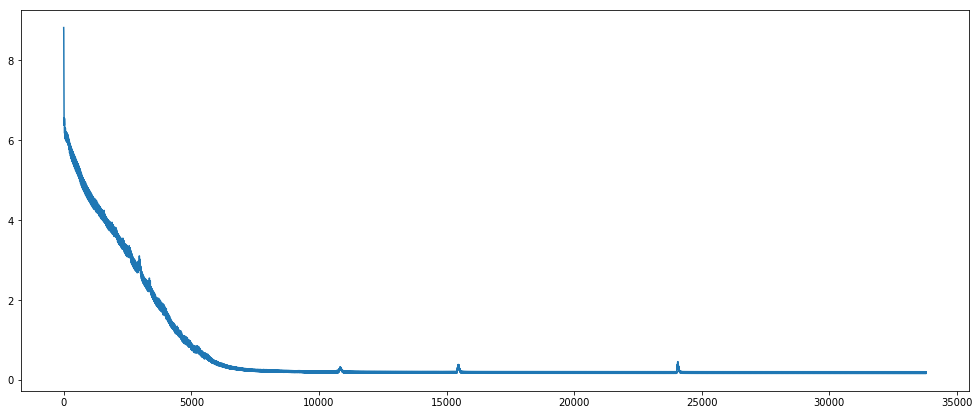

In [35]:
losses = build_train(
    num_epochs=1024,
    batch_size=128,
    rnn_size=512,
    embed_dim=256,
    seq_length=16,
    learning_rate=0.0005,
    show_every_n_batches=10)

In [36]:
generate_script()

INFO:tensorflow:Restoring parameters from ./save
moe_szyslak:(nods) keep my tail right here in this jar.
moe_szyslak: good times, but take you guys mr. what's the doctor is just the moe_szyslak: not a good agent on the back of america. you can pick us to you why did we make a five in the car.
moe_szyslak: this is like a horrible bar can 'cause as the three deal.
lenny_leonard: aw, morning, homer.
moe_szyslak: the point is to you, handsome!
marge_simpson: we gotta be honest, i was just back if you haven't into this again.
homer_simpson: i don't wanna tell you and you guys, two girls all over the half because in the nose?
homer_simpson: oh, moe! the perfect is moe, as it is.
homer_simpson:(singing) there four out of years.
lenny_leonard: oh yeah.
homer_simpson: i don't know, the boy in the middle of the service.
homer_simpson: you're true, even. we're outta back.
moe_szyslak: now, i just know what a bad marriage?
homer_simpson:(to phone) the only thing that can that even in the ticket to